In [48]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Pauli
from qiskit_aer.primitives import Estimator
import numpy as np

In [49]:
# Initialize a quantum circuit with 127 qubits
num_qubits = 127
qc = QuantumCircuit(num_qubits)

# Apply X gates
for i in range(num_qubits):
    for _ in range(i):
        qc.x(i)


# # Draw the circuit, use this for less no of circuit depths,say 5 instead of 127. Then it is easy to visualize
#qc.draw('mpl')

In [50]:
#Initialize a list to store the Pauli operators
pauli_operators = []

# Loop through the number of qubits and create Pauli operators
for i in range(num_qubits):
    pauli_string = ['I'] * num_qubits  # Start with all identity operators
    pauli_string[num_qubits-1-i] = 'Z'      # Set the i-th qubit to be a Z operator
    pauli_operators.append(Pauli(''.join(pauli_string)))


## optimize the problem for quatum execution 

In [51]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

# Initialize Qiskit Runtime Service
service = QiskitRuntimeService(instance='ibm-q/open/main')

# Print available backends
for backend in service.backends():
    print(backend.name)

# Get the 'ibm_brisbane' backend
backend = service.backend(name='ibm_brisbane')
print("Done getting the backend")

# Generate a preset pass manager for transpilation
pass_manager = generate_preset_pass_manager(optimization_level=1, backend=backend)

# Transpile the quantum circuit
qc_transpiled = pass_manager.run(qc)

# Apply layout transformations to a list of Pauli operators
operators_transpiled_list = [op.apply_layout(qc_transpiled.layout) for op in pauli_operators]


ibm_brisbane
ibm_sherbrooke
ibm_kyiv
Done getting the backend


## execute the code on backend

In [52]:
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_ibm_runtime import EstimatorOptions

options=EstimatorOptions()
options.resilience_level =2
options.optimization_level=0
options.dynamical_decoupling.enable=True
#options.dynamical_decoupling.sequence_type ="XY4"
options.dynamical_decoupling.sequence_type ="XpXm"
estimator=Estimator(backend, options=options)

# post processing and plot

In [53]:
#job_id='xxxxx' #28thsep2024,127,after running the job on quantum computer, take the job id and paste here. for many time running on local pc, it will fetch the data
service=QiskitRuntimeService()
job=service.job(job_id)

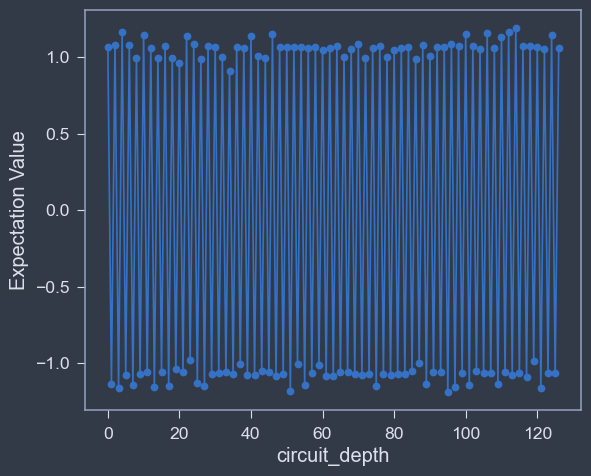

In [54]:
import matplotlib.pyplot as plt
data=list(range(1,len(pauli_operators)+1))
result=job.result()[0]
values=result.data.evs
plt.plot(range(num_qubits), values, '-o')
plt.xlabel('circuit_depth')
plt.ylabel('Expectation Value')


plt.savefig('127q-Corr-bit-flip-run-00.png')
plt.show()